# <center> 
# <center> 3f. SAR Simulation
## <center> ECO374

Load Python packages

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 1. Simulation

Simulate S-AR(1) data with seasonal lag at frequency 4

In [2]:
np.random.seed(156)
n = 140
phi = 0.8
wn = np.random.randn(n)
y_sim1 = np.zeros(n)
y_sim1[:4] = wn[:4]
for t in range(4, n):
    y_sim1[t] = phi*y_sim1[t-4] + wn[t]
y_sim1 = pd.DataFrame({"y1": y_sim1[50:]})

Plot the simulated data

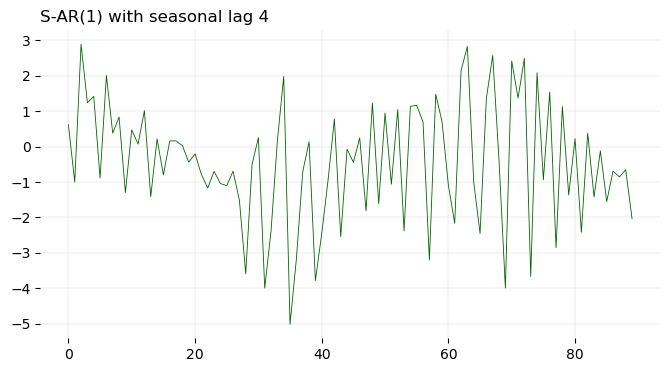

In [3]:
plt.figure(figsize=(8, 4))
plt.plot(y_sim1['y1'], color='darkgreen', linewidth=0.6)
plt.title('S-AR(1) with seasonal lag 4', loc='left')
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.show()

<div style="page-break-after: always;"></div>

# 2. ACF and PACF

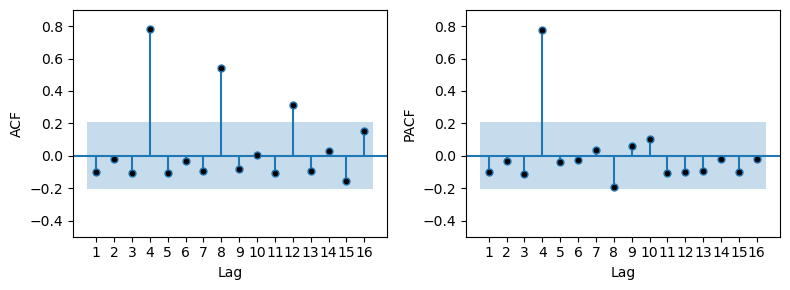

In [4]:
lag_max = 16

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
axs = axs.flatten()

plot_acf(y_sim1, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
         bartlett_confint=False, title=None, ax=axs[0])
axs[0].set_ylabel('ACF')

plot_pacf(y_sim1, lags=lag_max, alpha=0.05, zero=False, mfc='black', 
          title=None, ax=axs[1])
axs[1].set_ylabel('PACF')

for ax in axs:
    ax.set_ylim(-0.5,0.9)
    ax.set_xticks(np.arange(1, lag_max+1, step=1))
    ax.set_xlabel('Lag')

fig.tight_layout() 
plt.show()